In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("Afrotheria_out_iqtree_HKY_G5.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n61          1.8806 ( 1.6627,  2.1903) ( 1.6456,  2.1627)  0.5171 (Jnode 118)\n',
 't_n62          0.6898 ( 0.6549,  0.7377) ( 0.6520,  0.7325)  0.0805 (Jnode 117)\n',
 't_n63          0.6649 ( 0.6288,  0.7116) ( 0.6245,  0.7063)  0.0817 (Jnode 116)\n',
 't_n64          0.6460 ( 0.6091,  0.6927) ( 0.6071,  0.6895)  0.0824 (Jnode 115)\n',
 't_n65          0.4880 ( 0.4326,  0.5428) ( 0.4352,  0.5451)  0.1099 (Jnode 114)\n',
 't_n66          0.2488 ( 0.1967,  0.3017) ( 0.1964,  0.3010)  0.1046 (Jnode 113)\n',
 't_n67          0.2117 ( 0.1650,  0.2591) ( 0.1635,  0.2572)  0.0937 (Jnode 112)\n',
 't_n68          0.1407 ( 0.1050,  0.1808) ( 0.1044,  0.1798)  0.0754 (Jnode 111)\n',
 't_n69          0.0159 ( 0.0070,  0.0308) ( 0.0055,  0.0274)  0.0219 (Jnode 110)\n',
 't_n70          0.1725 ( 0.1322,  0.2154) ( 0.1332,  0.2160)  0.0829 (Jnode 109)\n',
 't_n71          0.1272 ( 0.0836,  0.1745) ( 0.0844,  0.1749)  0.0905 (Jnode 108)\n',
 't_n72          0.0357 ( 0.0219,  0.0533) ( 0.0218,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119']

In [6]:
posterior_mean_iqtree

[1.8806,
 0.6898,
 0.6649,
 0.646,
 0.488,
 0.2488,
 0.2117,
 0.1407,
 0.0159,
 0.1725,
 0.1272,
 0.0357,
 0.2151,
 0.1465,
 0.1716,
 0.0509,
 0.0186,
 0.0048,
 0.6011,
 0.4716,
 0.32,
 0.2395,
 0.1217,
 0.1959,
 0.2548,
 0.2374,
 0.1578,
 0.0888,
 0.0661,
 0.0272,
 0.132,
 0.0993,
 0.1607,
 0.2538,
 0.1998,
 0.1548,
 0.1024,
 0.0399,
 0.0296,
 0.0221,
 0.0139,
 0.0707,
 0.024,
 0.1439,
 0.0985,
 0.0643,
 0.0191,
 0.1586,
 0.0991,
 0.5913,
 0.5625,
 0.3615,
 0.0602,
 0.0481,
 0.015,
 0.1217,
 0.0931,
 1.2816,
 0.6559]

In [7]:
lower_ci_iqtree

[1.6627,
 0.6549,
 0.6288,
 0.6091,
 0.4326,
 0.1967,
 0.165,
 0.105,
 0.007,
 0.1322,
 0.0836,
 0.0219,
 0.168,
 0.1094,
 0.1305,
 0.0347,
 0.0072,
 0.0008,
 0.5615,
 0.4136,
 0.2622,
 0.1901,
 0.077,
 0.144,
 0.2018,
 0.1849,
 0.1123,
 0.0546,
 0.0391,
 0.0148,
 0.0904,
 0.0658,
 0.083,
 0.2079,
 0.1567,
 0.1175,
 0.063,
 0.0155,
 0.0089,
 0.0052,
 0.0011,
 0.0345,
 0.0043,
 0.1041,
 0.051,
 0.0268,
 0.0012,
 0.0943,
 0.0358,
 0.558,
 0.5277,
 0.3137,
 0.0442,
 0.0347,
 0.0068,
 0.0746,
 0.0529,
 1.1031,
 0.485]

In [8]:
upper_ci_iqtree

[2.1903,
 0.7377,
 0.7116,
 0.6927,
 0.5428,
 0.3017,
 0.2591,
 0.1808,
 0.0308,
 0.2154,
 0.1745,
 0.0533,
 0.2629,
 0.1862,
 0.2135,
 0.0706,
 0.0371,
 0.0127,
 0.6478,
 0.5278,
 0.3774,
 0.2921,
 0.1749,
 0.2494,
 0.3141,
 0.2964,
 0.2099,
 0.1319,
 0.103,
 0.0459,
 0.179,
 0.1378,
 0.2453,
 0.3011,
 0.2441,
 0.1954,
 0.1456,
 0.072,
 0.0568,
 0.0461,
 0.0361,
 0.1174,
 0.0553,
 0.1856,
 0.1497,
 0.115,
 0.0551,
 0.2213,
 0.1686,
 0.634,
 0.6048,
 0.4086,
 0.0861,
 0.0693,
 0.0288,
 0.1803,
 0.1441,
 1.4097,
 0.8676]

In [9]:
file_mcmctree = open("Afrotheria_out_baseml_HKY_G5.txt", "r")
lines1 = file_mcmctree.readlines()
file_mcmctree.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

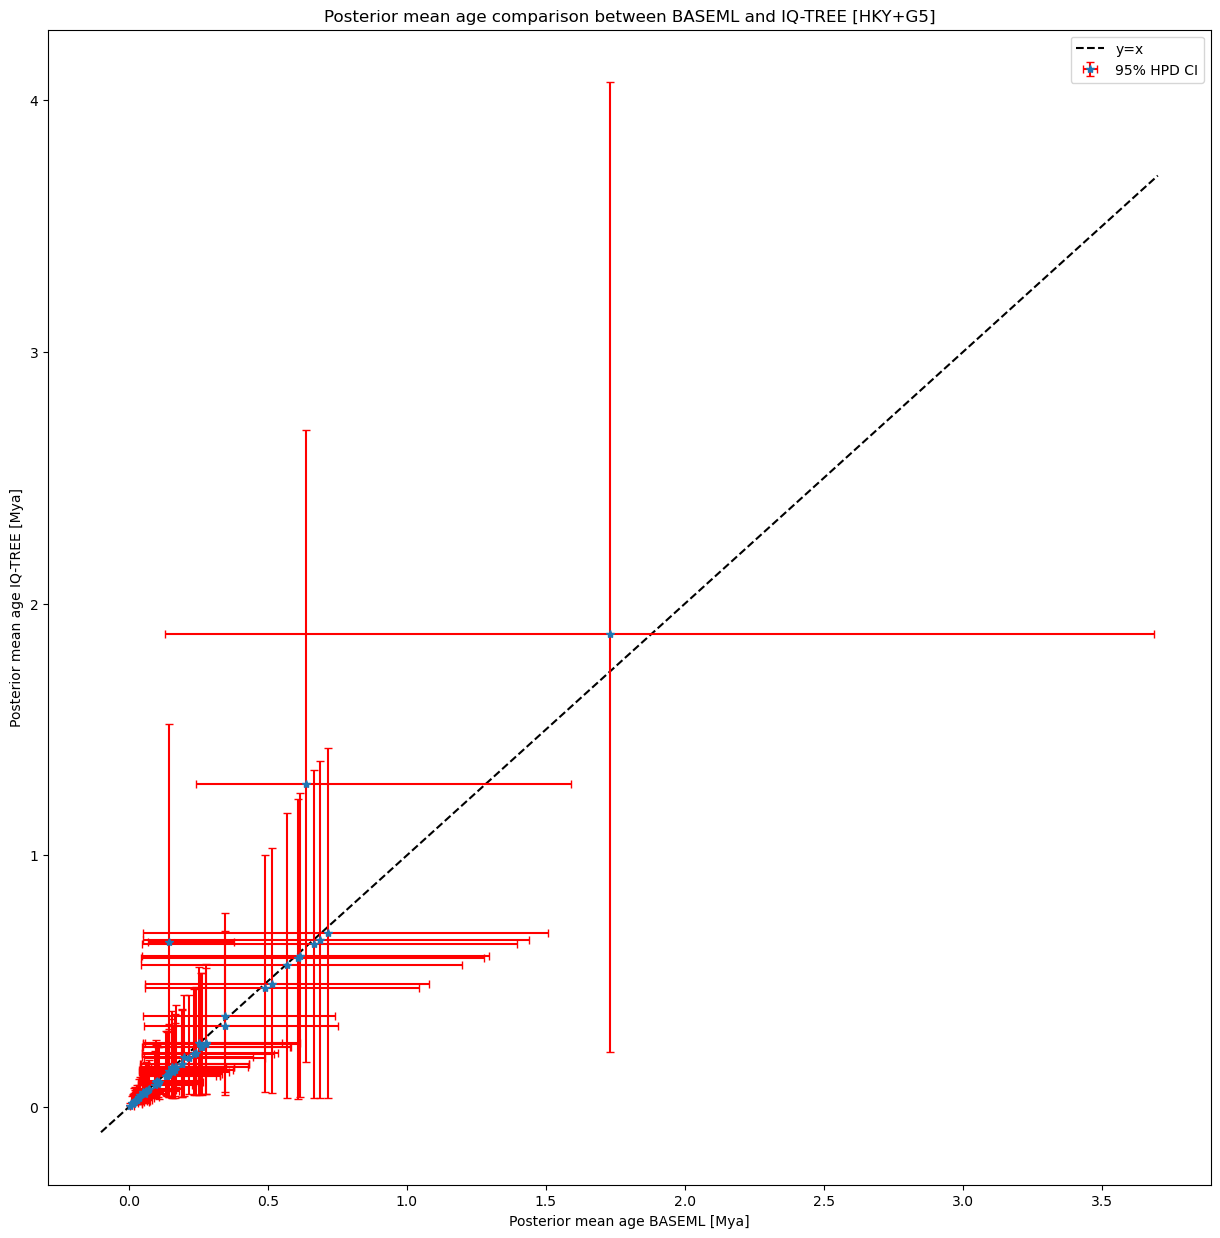

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.7], 
        [-0.1, 3.7], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [HKY+G5]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./Afrotheria_posterior_mean_age_comparison_HKY_G5.png')

In [11]:
posterior_mean_baseml

[1.7291,
 0.7166,
 0.6858,
 0.6648,
 0.5147,
 0.2766,
 0.2356,
 0.1579,
 0.0168,
 0.1922,
 0.1401,
 0.0375,
 0.2409,
 0.1656,
 0.1928,
 0.0582,
 0.0183,
 0.0047,
 0.6157,
 0.4907,
 0.3464,
 0.2642,
 0.1359,
 0.2151,
 0.2792,
 0.2605,
 0.1646,
 0.094,
 0.0695,
 0.0294,
 0.1435,
 0.1082,
 0.1682,
 0.2509,
 0.1997,
 0.1537,
 0.1026,
 0.0383,
 0.0286,
 0.0214,
 0.0135,
 0.0709,
 0.0235,
 0.1431,
 0.0974,
 0.0632,
 0.0182,
 0.1564,
 0.0983,
 0.6083,
 0.5701,
 0.3441,
 0.0526,
 0.0413,
 0.0129,
 0.1347,
 0.1039,
 0.6356,
 0.1437]

In [12]:
posterior_mean_iqtree

[1.8806,
 0.6898,
 0.6649,
 0.646,
 0.488,
 0.2488,
 0.2117,
 0.1407,
 0.0159,
 0.1725,
 0.1272,
 0.0357,
 0.2151,
 0.1465,
 0.1716,
 0.0509,
 0.0186,
 0.0048,
 0.6011,
 0.4716,
 0.32,
 0.2395,
 0.1217,
 0.1959,
 0.2548,
 0.2374,
 0.1578,
 0.0888,
 0.0661,
 0.0272,
 0.132,
 0.0993,
 0.1607,
 0.2538,
 0.1998,
 0.1548,
 0.1024,
 0.0399,
 0.0296,
 0.0221,
 0.0139,
 0.0707,
 0.024,
 0.1439,
 0.0985,
 0.0643,
 0.0191,
 0.1586,
 0.0991,
 0.5913,
 0.5625,
 0.3615,
 0.0602,
 0.0481,
 0.015,
 0.1217,
 0.0931,
 1.2816,
 0.6559]

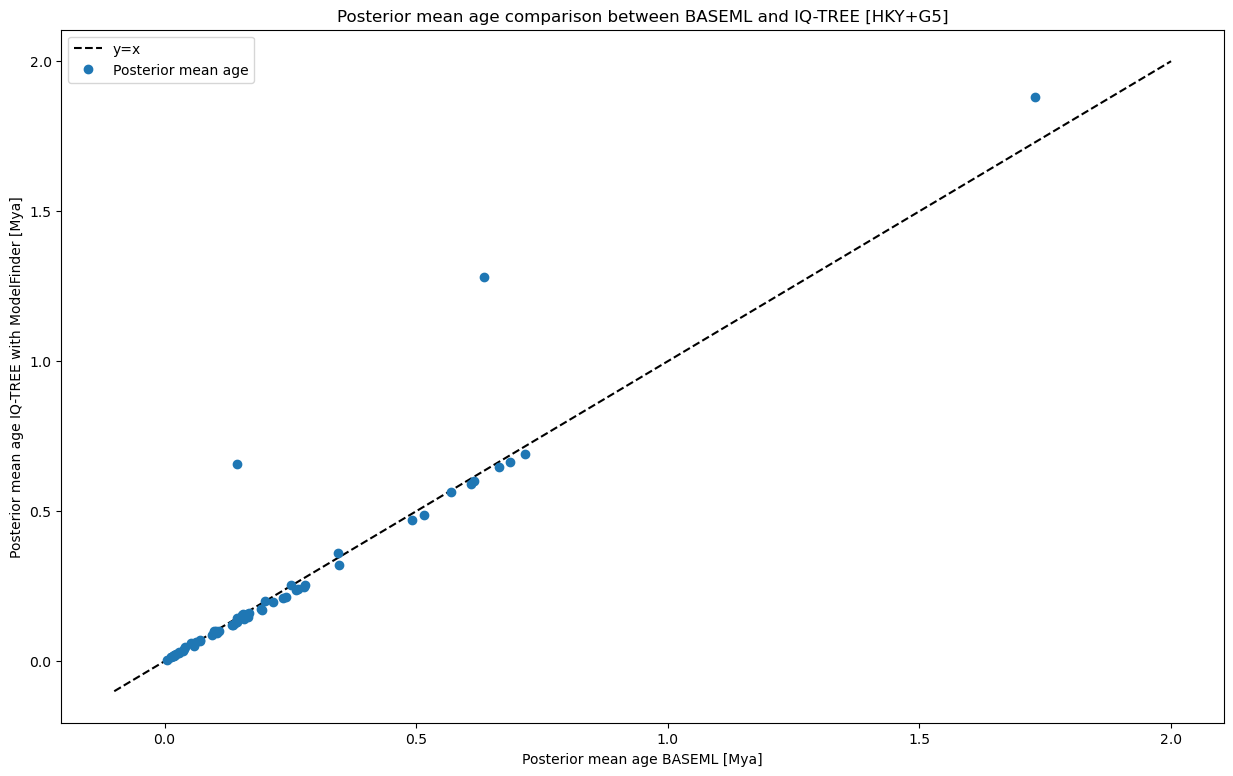

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.1,2.0], 
        [-0.1, 2.0], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE with ModelFinder [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [HKY+G5]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./Afrotheria_posterior_mean_age_comparison_HKY_G5_scatter.png')